WEEK 2 CLIMATE AND DISASTER MANAGEMENT SUBMISSION

Problem Statement:  Global climate patterns are changing, leading to unusual temperature fluctuations that may indicate extreme weather events, climate shifts, or environmental hazards. Traditional statistical methods often fail to detect subtle anomalies in large-scale historical climate data, especially when dealing with multiple variables (e.g., land temperature, ocean temperature, regional variations).

This project aims to develop a machine learning-based anomaly detection system to identify unusual temperature spikes over time. Using algorithms like Isolation Forest or Autoencoders, the system will analyze historical temperature datasets and flag anomalies that deviate significantly from established climate patterns.

---
Brief Introduction

Climate anomalies, such as unexpected temperature rises or drops, are critical indicators of potential climate-related risks. Detecting these anomalies early helps researchers, policymakers, and disaster management authorities anticipate extreme weather events, improve forecasting, and implement preventive measures.

This project leverages machine learning techniques to analyze historical temperature datasets (e.g., NASA GISTEMP, NOAA, or Kaggle's Global Temperature Anomalies dataset) and detect abnormal patterns. By applying anomaly detection methods, the system can identify temperature shifts that exceed normal variability, supporting climate monitoring and decision-making processes.

---





In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/hadcrut-monthly-ns-avg.csv")

In [8]:
print(df.head())

   1900-01-01  -0.266  -0.343  -0.200  -0.371  -0.160  -0.543  0.012  -0.399  \
0  1900-02-01  -0.172  -0.261  -0.105  -0.279  -0.065  -0.406  0.062  -0.312   
1  1900-03-01  -0.285  -0.368  -0.214  -0.389  -0.182  -0.494 -0.076  -0.420   
2  1900-04-01  -0.261  -0.328  -0.188  -0.372  -0.150  -0.447 -0.075  -0.398   
3  1900-05-01  -0.273  -0.372  -0.201  -0.381  -0.164  -0.464 -0.081  -0.409   
4  1900-06-01  -0.180  -0.274  -0.104  -0.289  -0.071  -0.354 -0.006  -0.314   

   -0.138  -0.574  0.039  
0  -0.043  -0.447  0.094  
1  -0.158  -0.535 -0.040  
2  -0.126  -0.492 -0.031  
3  -0.142  -0.507 -0.041  
4  -0.047  -0.399  0.040  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1900-01-01  1463 non-null   object 
 1   -0.266      1463 non-null   float64
 2   -0.343      1463 non-null   float64
 3   -0.200      1463 non-null   float64
 4   -0.371      1463 non-null   float64
 5   -0.160      1463 non-null   float64
 6   -0.543      1463 non-null   float64
 7   0.012       1463 non-null   float64
 8   -0.399      1463 non-null   float64
 9   -0.138      1463 non-null   float64
 10  -0.574      1463 non-null   float64
 11  0.039       1463 non-null   float64
dtypes: float64(11), object(1)
memory usage: 137.3+ KB
None


In [10]:
print(df.describe())

            -0.266       -0.343       -0.200       -0.371       -0.160  \
count  1463.000000  1463.000000  1463.000000  1463.000000  1463.000000   
mean      0.020379    -0.029266     0.067374    -0.036178     0.076912   
std       0.338737     0.349277     0.331018     0.356409     0.321777   
min      -0.832000    -0.910000    -0.745000    -0.926000    -0.738000   
25%      -0.214500    -0.274500    -0.158500    -0.289000    -0.143000   
50%      -0.029000    -0.067000     0.015000    -0.084000     0.031000   
75%       0.221000     0.182500     0.254000     0.177000     0.261500   
max       1.111000     1.062000     1.155000     1.084000     1.138000   

            -0.543        0.012       -0.399       -0.138       -0.574  \
count  1463.000000  1463.000000  1463.000000  1463.000000  1463.000000   
mean     -0.139973     0.180735    -0.055444     0.095488    -0.158206   
std       0.353749     0.327718     0.357780     0.321440     0.360539   
min      -1.024000    -0.640000    -0

In [11]:
df.isnull().sum()

,0
1900-01-01,0
-0.266,0
-0.343,0
-0.200,0
-0.371,0
-0.160,0
-0.543,0
0.012,0
-0.399,0
-0.138,0


In [12]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])


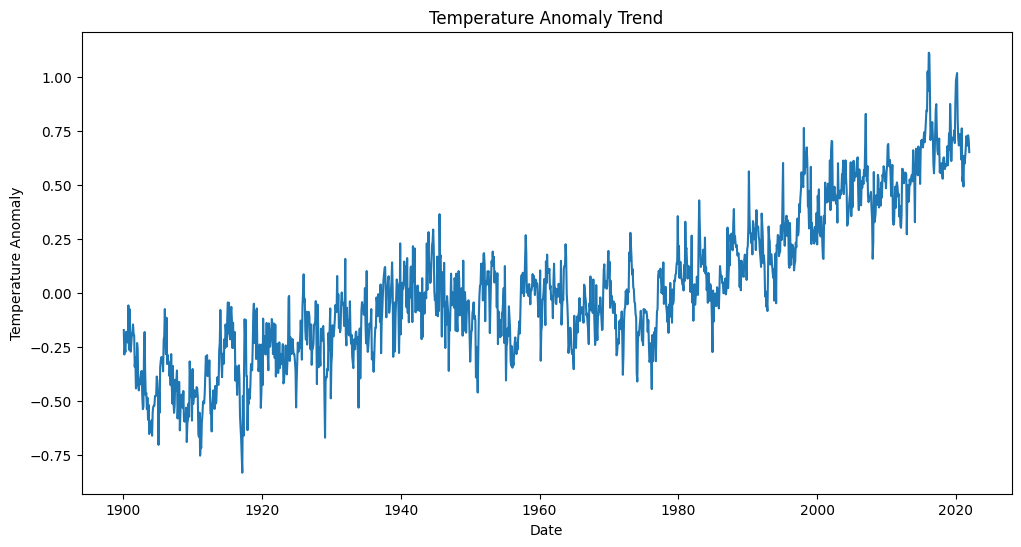

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:, 0], df.iloc[:, 1])
plt.title("Temperature Anomaly Trend")
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly")
plt.show()



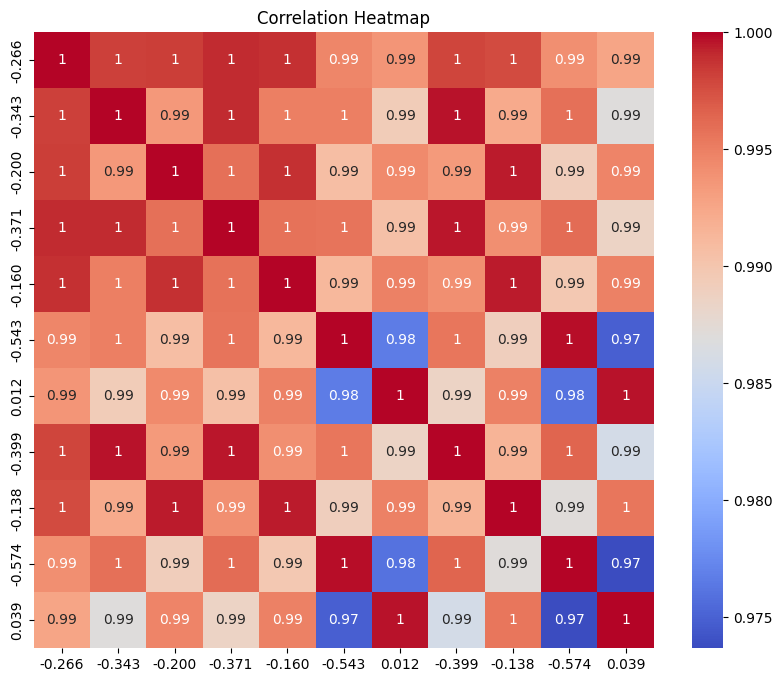

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [17]:
df = df.fillna(method='ffill')

/tmp/ipython-input-569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipython-input-569672361.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(method='ffill')


In [18]:
df['temp_mean'] = df.iloc[:, 1:].mean(axis=1)

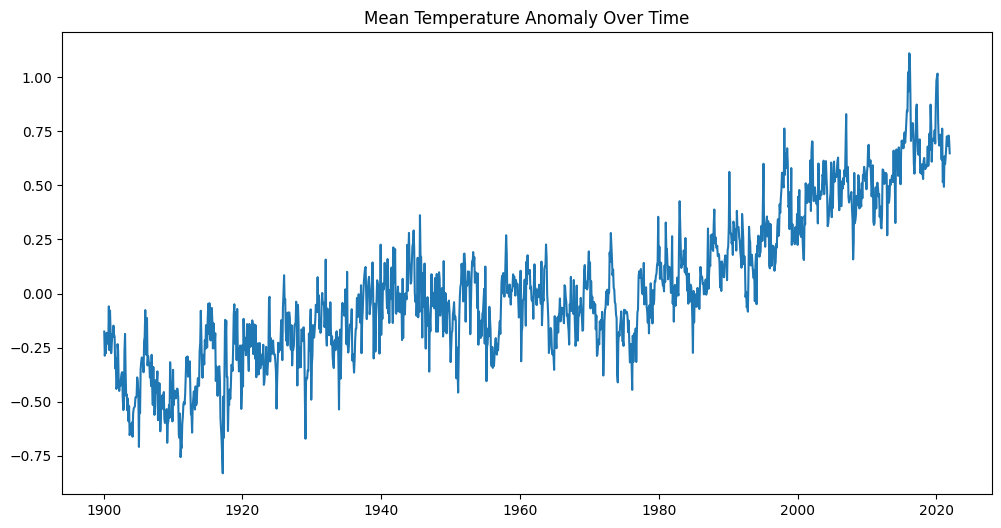

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:, 0], df['temp_mean'])
plt.title("Mean Temperature Anomaly Over Time")
plt.show()